<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Polynomial-Regression---12-Pts" data-toc-modified-id="Polynomial-Regression---12-Pts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polynomial Regression - 12 Pts</a></span><ul class="toc-item"><li><span><a href="#a)--Loading-and-Inspecting-the-Data-------2-Pts" data-toc-modified-id="a)--Loading-and-Inspecting-the-Data-------2-Pts-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>a)  Loading and Inspecting the Data   -   2 Pts</a></span></li><li><span><a href="#b)-Constructing-the-Vandermonde-Matrix-------2-Pts" data-toc-modified-id="b)-Constructing-the-Vandermonde-Matrix-------2-Pts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>b) Constructing the Vandermonde Matrix   -   2 Pts</a></span></li><li><span><a href="#c)--Moore-Penrose-Pseudoinverse---2-Pts" data-toc-modified-id="c)--Moore-Penrose-Pseudoinverse---2-Pts-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>c)  Moore-Penrose Pseudoinverse - 2 Pts</a></span></li><li><span><a href="#d)-Coefficients---2-Pts" data-toc-modified-id="d)-Coefficients---2-Pts-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>d) Coefficients - 2 Pts</a></span></li><li><span><a href="#e)-Predictive-Polynomial---2-Pts" data-toc-modified-id="e)-Predictive-Polynomial---2-Pts-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>e) Predictive Polynomial - 2 Pts</a></span></li><li><span><a href="#f)-Fitting-different-degree-Polynomials---2-Pts" data-toc-modified-id="f)-Fitting-different-degree-Polynomials---2-Pts-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>f) Fitting different degree Polynomials - 2 Pts</a></span></li></ul></li></ul></div>

Polynomial Regression - 12 Pts
==========

In this week's programming exercise, you are asked to implement the basic building blocks for polynomial regression step-by-step. We will do the following:


- **a)** Load a very simple, noisy dataset and inspect it.
- **b)** Construct a design matrix for polynomial regression of degree m: the Vandermonde matrix.
- **c)** Calculate the Moore-Penrose pseudoinverse of the design matrix.
- **d)** Calculate a vector of coefficients that minimizes the squared error of an n-degree polynomial on our given set of measurements (data).
- **e)** Use this coefficient (weight) vector to construct a polynomial that predicts the underlying function the noisy data is drawn from.
- **f)** With the work we have done before, we look at a polynomials of different degrees we fit using the provided data.


Before you start, make sure that you have downloaded the file *poly_data.csv* from stud.ip and put it in the same folder as this notebook! You are supposed to implement the functions yourself!

In [58]:
# the usual imports.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a)  Loading and Inspecting the Data   -   2 Pts
------------
1. Use the numpy function ```np.loadtxt()``` to load the data from *poly_data.csv* into a variable ```data```. Numpy does not know that we're loading a CSV. Provide the right delimiter as a parameter to ```np.loadtxt()```.


2. ```data``` should now be an $n\times n$ ```ndarray``` matrix. Check whether this is true by using the native python function ```type()``` and the data attribute ```shape``` to obtain the type and dimensions of ```data```.


3. The first row and second row correspond to the [independent and dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables) respectively. Store them in two different, new variables **X** (independent) and **Y** (dependent).


4. Use matplotlib's ```scatter()``` to take a look at the data. It has been generated by sampling a function $f$ and adding Gaussian noise:


\begin{align}
y_i &= f(x_i) + \epsilon \\
\epsilon &\sim \mathcal{N}(0, \sigma^2)
\end{align}

You can use execute the second cell below to take a look at $f(x)$.

data type:	ndarray
data shape:	(2, 100)


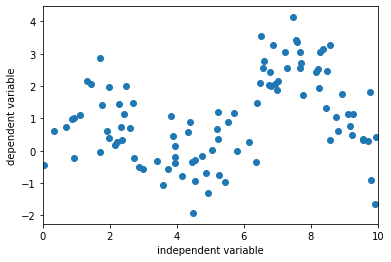

In [59]:
# 1. Read data
data = np.loadtxt("poly_data.csv", delimiter=',')

# 2. Validate data's format
data_type = type(data) # code
data_shape = data.shape # code

print(f'data type:\t{data_type.__name__}')
print(f'data shape:\t{data.shape}')

# 3. Store the two rows in data as two seperate variables: X and Y
# code
X = data[0]
Y = data[1]

# 4. Generate a scatterplot using X and Y
# code
plt.scatter(X, Y)

# setting and labeling your axis
plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.xlim((0,10));

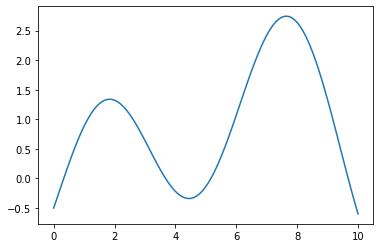

In [60]:
# Taking a look at f(x)
def target_func(x):
    return 1.5*np.sin(x) - np.cos(x/2) + 0.5

x = np.linspace(0,10, 101)
y = target_func(x)
plt.plot(x,y);

b) Constructing the Vandermonde Matrix   -   2 Pts
--------

In the lecture, you have derived the formula for linear regression with arbitrary basis functions and normal distributed residuals $\epsilon$. Here, we choose polynomial basis functions and therefore will try and approximate the function above via a polynomial of degree $m$:
$$y = \alpha_0 + \alpha_1x + \alpha_2x^2 + \alpha_3x^3 + \dots + \alpha_mx^m + \epsilon$$
Due to our choice of basis functions, this is called polynomial regression.

The simplest version of polynomial regression uses monomial basis functions $\{1, x, x^2, x^3, \dots \}$ in the design matrix. Such a matrix is called the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) in linear algebra. Implement a function that takes the observed, independent variables $x_i$ stored in **X** and constructs a design matrix of the following form:

$$ \Phi = \begin{bmatrix} 1 & x_1 & x_1^2 & \dots & x_1^m \\ 1 & x_2 & x_2^2 & \dots & x_2^m \\ 1 & x_3 & x_3^2 & \dots & x_3^m \\ \vdots & \vdots & \vdots & & \vdots \\ 1 & x_n & x_n^2 & \dots & x_n^m \end{bmatrix}$$

We have provided the function's doc string as well as two quick lines that test your implementation in the notebook cell below.

In [61]:
def poly_dm(x, m):
    """
    Generate a desing matrix with monomial basis functions.
    
    Parameters
    ----------
    x : array_like
        1-D input array.
    m : int
        degree of the monomial used for the last column.
    
    Returns
    -------
    phi : ndarray
        Design matrix.
        The columns are ``x^0, x^1, ..., x^m``.
    """

    # We need a design matrix with as many rows as entries in x 
    # and m+1 columns 
    # Use np.zeros to create a matrix with all entries set to 0

    phi = np.zeros((x.size, m + 1))# code
    
    # for each row:
    for row in range(x.size) :
        # and each column:
        for col in range(m + 1) :
            # calculate the entry 
            phi[row,col] = np.power(x[row], col)
    return phi

# the lines below test the poly_dm function. no need to understand this code
try:
    print('poly_dm:',(lambda a=np.random.rand(10):'O.K.'if np.allclose(poly_dm(a,3),np.vander(a,4,True))else'Something went wrong! (Your result does not match!)')())
except:
    print('poly_dm: Something went horribly wrong! (an error was thrown)')
    #print(sys.exc_inf())

poly_dm: O.K.


c)  Moore-Penrose Pseudoinverse - 2 Pts
--------

According to the lecture, it is quite usefull to calculate the Moore-Penrose pseudoinverse $A^\dagger$ of a matrix:
<br><br>
$$ A^\dagger = (A^T A)^{-1}A^T$$
<br>
where $A^T$ means transpose of matrix $A$ and $A^{-1}$ denotes its inverse.

According to the docstring in the cell below, implement a function that returns $A^\dagger$ for a matrix $A$, and test your implementation against the small test that is included. 

For all matrix operations that you need to perform there are numpy functions such as ```np.dot()``` for the dot product between two matrices and matrix attributes like ```matrix.T``` for the transpose of a matrix available.

In [62]:
def pseudoinverse(A):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.
    
    Parameters
    ----------
    A : (M, N) array_like
      Matrix to be pseudo-inverted.
      
    Returns
    -------
    A_pinverse : (N, M) ndarray
      The pseudo-inverse of `a`.
    """
    # Hint: Cast A as matrix and check numpy matrix attributes at 
    # https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
    # Furthermore, check out numpy's @ operator
    
    # code
    A = np.matrix(A)
    A_pinverse = ((A.getT() @ A).getI()) @ A.getT()
    return np.array(A_pinverse)

# the lines below test the pseudo_inverse function
try:
    print('pseudo_inverse:',(lambda m=np.random.rand(9,5):'Good Job!'if np.allclose(pseudoinverse(m),np.linalg.pinv(m))else'Not quite! (Your result does not match!)')())
except:
    print('pseudo_inverse: Absolutely not! (an error was thrown)')

pseudo_inverse: Good Job!


d) Coefficients - 2 Pts
-------
To estimate the parameters $w_i$ up to a chosen degree $m$, we use the vector $\vec{w}^{\,}$ containing all the $w_i$ and solve the following formula:
\begin{align}
y &= \Phi \vec{w}^{\,} \\
\vec{w}^{\,} &= \Phi^\dagger y
\end{align}
where $\Phi$ is the design matrix and $\Phi^\dagger$ its pseudoinverse and $y$ is the vector of dependent variables we observed in our dataset and stored in **Y**.

Implement a function that calculates $\vec{w}^{\,}$ according to the docstring given below. Again, a short test of your implementation is provided.

In [63]:
def poly_regress(x, y, deg):
    """
    Least squares polynomial fit.
    
    Parameters
    ----------
    x : array, shape (M,)
        x-coordinates of the M sample points.

    y : array, shape (M,)
        y-coordinates of the sample points.
    
    deg : int
        Degree of the fitting polynomial.
    
    Returns
    -------
    w : array, shape (deg+1,)
        Polynomial coefficients, highest power last.
    """
    
    # code
    w = pseudoinverse(poly_dm(x, deg)) @ y
    
    return w

# the lines below test the poly_regress function
try:
    print('poly_regress:',(lambda a1=np.random.rand(9),a2=np.random.rand(9):'Ace!'if 
                           np.allclose(poly_regress(a1,a2,2),np.polyfit(a1,a2,2)[::-1])else'Almost! (Your result does not match!)')())
except:
    print('poly_regress: Not nearly! (an error was thrown)')

poly_regress: Ace!


e) Predictive Polynomial - 2 Pts
--------
The last function we will write will use the vector of coefficients we can now calculate to construct a polynomial function and evaluate it at any point we choose to. Remember, the form of this polynomial is given by:
<br><br>
$$y = w_0 + w_1x + w_2x^2 + w_3x^3 + \dots + w_mx^m$$

This is the model we assumed above, but we do not need to include the noise term here! Again, the function is specified in a docstring and tested in the little {try - catch} block below. *Hint:* The order of the polynomial you need to calculate is (indirectly!) given by the length of **w**, the number of coefficients. 


In [64]:
def polynom(x, w):
    """ Evaluate a polynomial.
    
    Parameters
    ----------
    x : 1d array
        Points to evaluate.
    
    w : 1d array
        Coefficients of the monomials.
    
    Returns
    -------
    y : 1d array
        Polynomial evaluated for each cell of x.
    """
    
    # code
    y = np.zeros((x.size))
    for i in range(w.size) :
        y += w[i] * np.power(x, i)
    return y

# the lines below test the polynom function
try:
    print('polynom:',(lambda a1=np.random.rand(9),a2=np.random.rand(9):'OK'if np.allclose(polynom(a1,a2),np.polyval(a2[::-1],a1))else'Slight failure! (Your result does not match!)')())
except:
    print('polynom: Significant failure! (an error was thrown)')

polynom: OK


f) Fitting different degree Polynomials - 2 Pts
------
__"f"__, as in finally. We can now use all the functions we have written above to investigate how well a polynomial of a degree $m$ fits the noisy data we are given. For $m \in \{1,3,10\}$, estimate a polynomial function on the data. Evaluate the three functions on a vector of equidistant points between 0 and 10 (*linearly spaced*). Additionally, plot the original target function $f(x)$, as well as the scatter plot of the data samples. Make sure every graph and the scatter appear in the same plot. Label each graph by adding a label argument to the ```plt.plot``` function. This allows the use of the ```legend()``` function and makes the plot significantly more understandable!

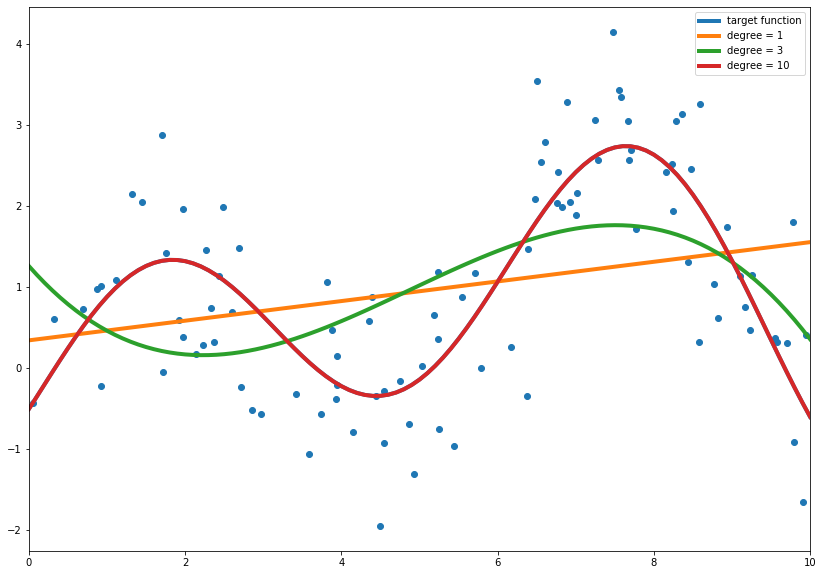

In [65]:
plt.figure(figsize=(14, 10))

x = np.linspace(0,10,101)
y = target_func(x)
plt.scatter(X,Y)
plt.plot(x,y,label='target function',lw=4)

m = [1, 3, 10]

# For every degree:
    # code
    # plt.plot(..
for i in m :
    plt.plot(x, polynom(x, poly_regress(x, y, i)), label='degree = '+ str(i),lw=4)
    
plt.xlim((0,10))
plt.legend();

This code cell is just for easier correction by the tutors


In [66]:
# b) the lines below
try:
    print('poly_dm:',(lambda a=np.random.rand(10):'O.K.'if np.allclose(poly_dm(a,3),np.vander(a,4,True))else'Something went wrong! (Your result does not match!)')())
except:
    print('poly_dm: Something went horribly wrong! (an error was thrown)')
    print(sys.exc_inf())

# c) the lines below test the pseudo_inverse function
try:
    print('pseudo_inverse:',(lambda m=np.random.rand(9,5):'Good Job!'if np.allclose(pseudoinverse(m),np.linalg.pinv(m))else'Not quite! (Your result does not match!)')())
except:
    print('pseudo_inverse: Absolutely not! (an error was thrown)')

# d) the lines below test the poly_regress function
try:
    print('poly_regress:',(lambda a1=np.random.rand(9),a2=np.random.rand(9):'Ace!'if 
                           np.allclose(poly_regress(a1,a2,2),np.polyfit(a1,a2,2)[::-1])else'Almost! (Your result does not match!)')())
except:
    print('poly_regress: Not nearly! (an error was thrown)')
    
# e) the lines below test the polynom function
try:
    print('polynom:',(lambda a1=np.random.rand(9),a2=np.random.rand(9):'OK'if np.allclose(polynom(a1,a2),np.polyval(a2[::-1],a1))else'Slight failure! (Your result does not match!)')())
except:
    print('polynom: Significant failure! (an error was thrown)')

poly_dm: O.K.
pseudo_inverse: Good Job!
poly_regress: Ace!
polynom: OK
